This whole notebook is based on the material of [this Machine Learning workshop](https://carpentries-incubator.github.io/machine-learning-novice-python/index.html) by Tom Pollard and [that one](https://carpentries-incubator.github.io/machine-learning-novice-sklearn/) by Colin Sauze, although most of the course is directly taken from these two we've made some alterations at various places when we thought it was needed.

# Set Up

Make sure you have the following data file eicu_cohort.csv in the same folder as this notebook. If you downloaded the repo [there](https://github.com/ICR-SD-CC/ML_workshop_saqi_bourdim) it should be ok.

Otherwise, you can get it from [here](https://carpentries-incubator.github.io/machine-learning-novice-python/setup.html) see section "Obtain lesson materials"

We shall use Jupyter Notebooks for working with Python. See section [github README](https://github.com/ICR-SD-CC/ML_workshop_saqi_bourdim/blob/main/README.md) or "Option A: Jupyter Notebook
" [here](https://carpentries-incubator.github.io/machine-learning-novice-python/setup.html) for methods to install and run it.

Then to install the proper libraries needed for this course, remove the "#" in the following cell and press ctrl+Enter:


In [ ]:
#!pip install numpy pandas sklearn tableone

In [14]:
import pandas as pd
pd.read_csv("eicu_cohort.csv")

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,actualhospitalmortality,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight
0,Male,45.0,116.00,3.0778,41,46,ALIVE,109.0,154.0,1.01,36.20,41.0,10.0,178.0
1,Male,57.0,NaN,7.6736,26,31,ALIVE,106.0,46.0,-1.00,36.30,6.0,10.1,172.7
2,Female,59.0,66.60,15.0778,56,61,ALIVE,134.0,172.0,1.03,34.80,32.0,25.5,170.2
3,Male,63.0,71.90,1.3201,77,88,EXPIRED,133.0,40.0,4.30,32.60,39.0,12.6,167.6
4,Male,67.0,104.80,1.5257,75,88,EXPIRED,31.0,133.0,0.70,36.44,31.0,11.3,182.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Male,54.0,72.50,9.0049,102,107,ALIVE,113.0,69.0,1.70,38.50,41.0,24.3,177.8
231,Male,70.0,89.70,6.0743,49,75,ALIVE,86.0,51.0,0.90,36.70,34.0,0.7,162.5
232,Female,54.0,109.10,12.7549,40,45,ALIVE,52.0,126.0,1.50,37.00,4.0,6.9,162.5
233,Male,25.0,99.79,0.7896,23,23,ALIVE,102.0,125.0,1.00,36.10,34.0,12.1,69.0


## Contents

 - *00:00*	**1. Introduction	What is machine learning?**
     - What is the relationship between machine learning, AI, and statistics?
     - What is meant by supervised learning?
 - *00:30*	**2. Data preparation**	
   - Why are some common steps in data preparation?
   - What do we partition data at the start of a project?
   - What is the purpose of setting a random state when partitioning?
   - Should we impute missing values before or after partitioning?
 - *01:00*	**3. Learning**	
    - How do machines learn?
    - How can machine learning help us to make predictions?
    - Why is it important to be able to quantify the error in our models?
    - What is an example of a loss function?
 - *01:30*	**4. Modelling**	
    - Broadly speaking, when talking about regression and classification, how does the prediction target differ?
     -  Would linear regression be most useful for a regression or classification task? How about logistic regression?
 - *02:10*	**5. Validation**
    - What is meant by model accuracy?
    - What is the purpose of a validation set?
    - What are two types of cross validation?
    - What is overfitting?
 - *02:40*	**6. Evaluation**	
    - What kind of values go into a confusion matrix?
    - What do the letters AUROC stand for?
    - Does an AUROC of 0.5 indicate our predictions were good, bad, or average?
    - In the context of evaluating performance of a classifier, what is TP?
 - *03:10*	**7. Clustering** (We have replaced Bootstrapping with Clustering)	
      - What is unsupervised learning?
      - How can we use use the k-means algorithm to find structure in the data?
      - What are some advantages and limitations of the k-means clustering algorithm?
      - What are some other methods that can be used when k-means doesn't work? What is spectral clustering?
 - *03:40*	**8. Data leakage**	
    - What are common types of data leakage?
    - How does data leakage occur?
    - What are the implications of data leakage?
 - *04:10*	**Finish**	


# Introduction: What is machine learning?

Ths material is taken from 'https://carpentries-incubator.github.io/machine-learning-novice-sklearn/01-introduction/index.html' 

## Questions
 - What is machine learning?
 - What are some useful machine learning techniques?

## Objectives
 - Gain an overview of what machine learning is and the techniques available.
 - Understand how machine learning and artificial intelligence differ.
 - Be aware of some caveats when using Machine Learning.

## Artificial intelligence vs machine learning

The term machine learning (ML) is often mentioned alongside artificial intelligence (AI) and deep learning (DL). Deep learning is a subset of machine learning, and machine learning is a subset of artificial intelligence.

AI is increasingly being used as a catch-all term to describe things that encompass ML and DL systems - from simple email spam filters, to more complex image recognition systems, to large language models such as ChatGPT. The more specific term “Artificial General Intelligence” (AGI) is used to describe a system possessing a “general intelligence” that can be applied to solve a diverse range of problems, often mimicking the behaviour of intelligent biological systems. Modern attempts at AGI are getting close to fooling humans, but while there have been great advances in AI research, human-like intelligence is only possible in a few specialist areas.

ML refers to techniques where a computer can “learn” patterns in data, usually by being shown many training examples. While ML algorithms can learn to solve specific problems, or multiple similar problems, they are not considered to possess a general intelligence. ML algorithms often need hundreds or thousands of examples to learn a task and are confined to activities such as simple classifications. A human-like system could learn much quicker than this, and potentially learn from a single example by using it’s knowledge of many other problems.

DL is a particular field of machine learning where algorithms called neural networks are used to create highly complex systems. Large collections of neural networks are able to learn from vast quantities of data. Deep learning can be used to solve a wide range of problems, but it can also require huge amounts of input data and computational resources to train.

The image below shows the relationships between artificial intelligence, machine learning and deep learning.


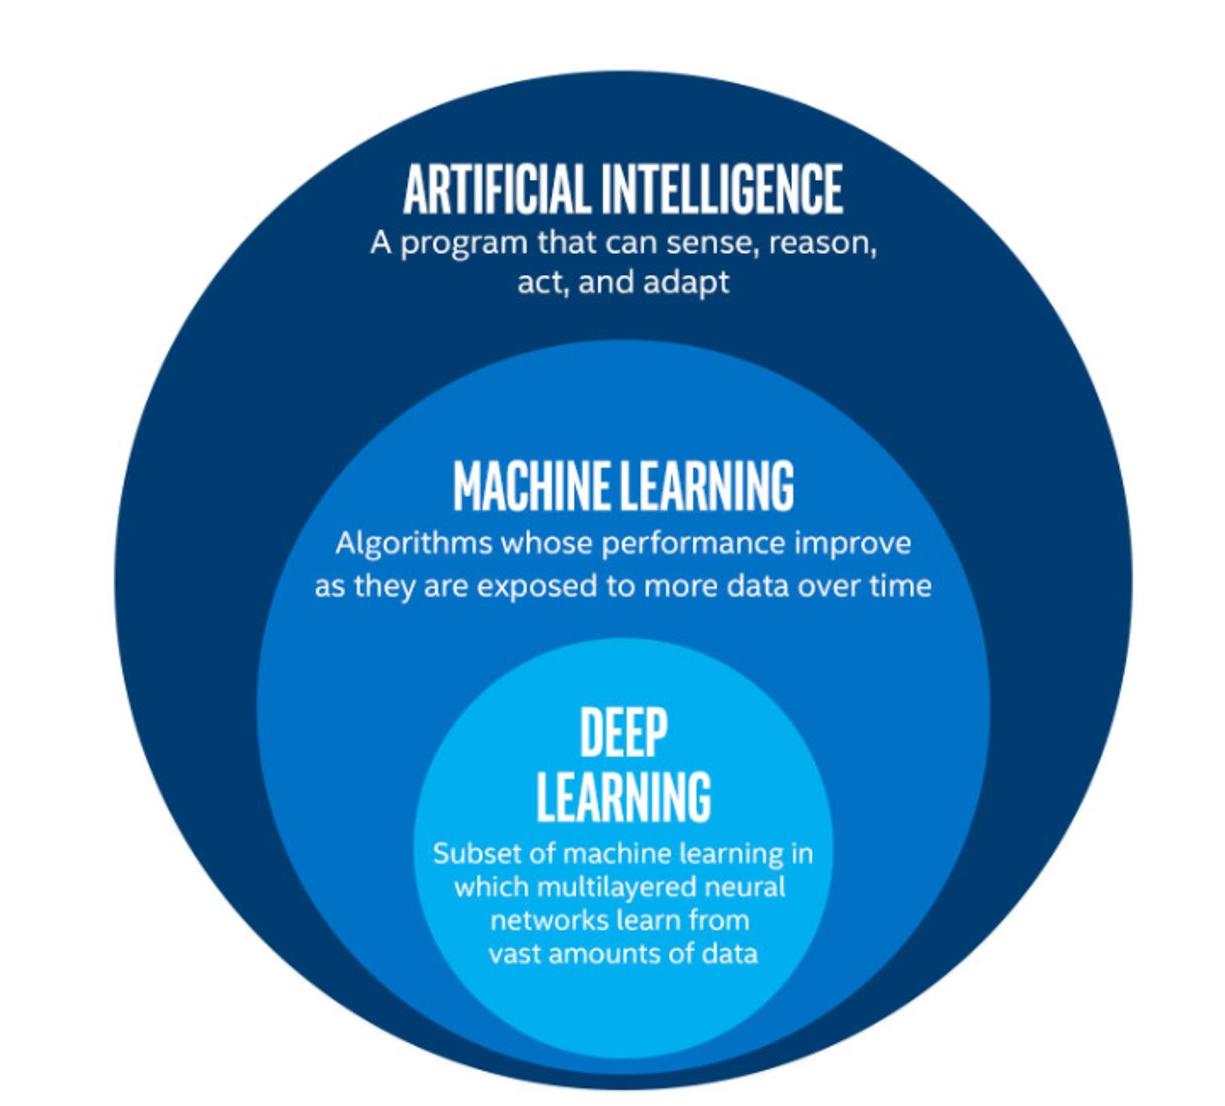

The image above is by Tukijaaliwa, CC BY-SA 4.0, via Wikimedia Commons, original source

## Is it all hot air?

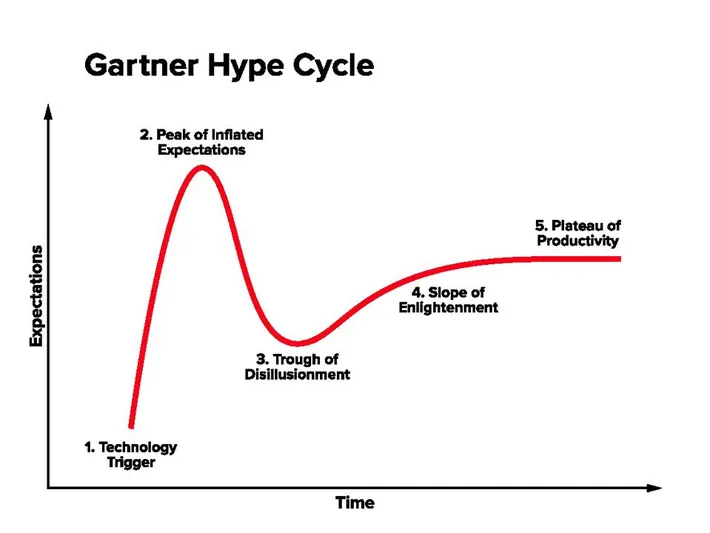

Everyone talks about machine learning—grand claims, endless buzzwords, and promises of revolutionizing everything. But hype doesn’t build solutions, understanding does. Machine learning isn’t magic; it’s a tool. The true value emerges when we cut through the noise and focus on practical applications, where thoughtful questions matter more than flashy answers.

## Limitations of machine learning
Like any other systems machine learning has limitations, caveats, and “gotchas” to be aware of that may impact the accuracy and performance of a machine learning system.

**Garbage in = garbage out**
 - There is a classic expression in computer science: “garbage in = garbage out”. This means that if the input data we use is garbage then the ouput will be too. If, for example, we try to use a machine learning system to find a link between two unlinked variables then it may well manage to produce a model attempting this, but the output will be meaningless.

**Biases due to training data**
 - The performance of a ML system depends on the breadth and quality of input data used to train it. If the input data contains biases or blind spots then these will be reflected in the ML system. For example, if we collect data on public transport use from only high socioeconomic areas, the resulting input data may be biased due to a range of factors that may increase the likelihood of people from those areas using private transport vs public options.

**Extrapolation**
 - We can only make reliable predictions about data which is in the same range as our training data. If we try to extrapolate beyond the boundaries of the training data we cannot be confident in our results. As we shall see some algorithms are better suited (or less suited) to extrapolation than others.

 - **Over fitting**:
Sometimes ML algorithms become over-trained and subsequently don’t perform well when presented with real data. It’s important to consider how many rounds of training a ML system has received and whether or not it may have become over-trained. It is also important the consider the number of parameters that the model has, the more it has the more flexible it can be, but sometimes too much flexibility makes the model "sticks" too much to the training data and doesn't generalise well to other data. The trade-off that we need to deal with is called bias-variance trade-off and is visually described [here](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/). 

 - Inability to explain answers
Machine learning techniques will return an answer based on the input data and model parameters even if that answer is wrong. Most systems are unable to explain the logic used to arrive at that answer. This can make detecting and diagnosing problems difficult.

## Getting started with Scikit-Learn

About Scikit-Learn
Scikit-Learn is a python package designed to give access to well-known machine learning algorithms within Python code, through a clean application programming interface (API). It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python’s NumPy (Numerical Python) and SciPy (Scientific Python) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, Scikit-Learn is not specifically designed for extremely large datasets, though there is some work in this area. For this introduction to ML we are going to stick to processing small to medium datasets with Scikit-Learn, without the need for a graphical processing unit (GPU).

Like any other Python package, we can import Scikit-Learn and check the package version using the following Python commands:


In [1]:
# code cell

import sklearn
print('scikit-learn:', sklearn.__version__)

scikit-learn: 1.2.2


## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we’ll start by discussing how data can be represented in order to be understood by the computer.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]

We typically have a “Features Matrix” (usually referred to as the code variable X) which are the “features” data we wish to train on.

`n_samples`: The number of samples. A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
`n_features`: The number of features (variables) that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.
If we want our ML models to make predictions or classifications, we also provide “labels” as our expected “answers/results”. The model will then be trained on the input features to try and match our provided labels. This is done by providing a “Target Array” (usually referred to as the code variable y) which contains the “labels or values” that we wish to predict using the features data.

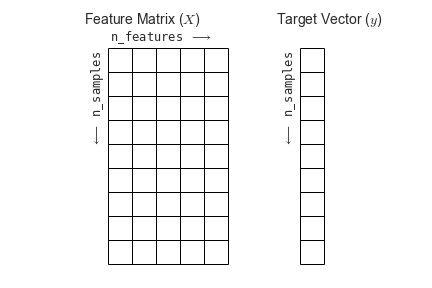

# Data Preparation

This section is taken fron https://carpentries-incubator.github.io/machine-learning-novice-python/02-data/index.html

**Questions**:
 - Why are some common steps in data preparation?
 - What is SQL and why is it often needed?
 - What do we partition data at the start of a project?
 - What is the purpose of setting a random state when partitioning?
 - Should we impute missing values before or after partitioning?

**Objectives**:
- Explore characteristics of our dataset.
- Partition data into training and test sets.
- Encode categorical values.
- Use scaling to pre-process features.

## Load the data

Machine learning helps us to find patterns in data, so sourcing and understanding data is key. Unsuitable or poorly managed data will lead to a poor project outcome, regardless of the modelling approach.

We will be using an open access subset of the eICU Collaborative Research Database, a publicly available dataset comprising deidentified physiological data collected from critically ill patients. For simplicity, we will be working with a pre-prepared CSV file that comprises data extracted from a demo version of the dataset.

Let’s begin by loading this data:

In [2]:
# code cell 

import pandas as pd

# load the data
cohort = pd.read_csv('./eicu_cohort.csv')

## Knowing the data
Before moving ahead on a project, it is important to understand the data. Having someone with domain knowledge - and ideally first hand knowledge of the data collection process - helps us to design a sensible task and to use data effectively.

Summarizing data is an important first step. We will want to know aspects of the data such as: extent of missingness; data types; numbers of observations. One common step is to view summary characteristics (for example, see Table 1 of the paper by Rajkomar et al.).

Let’s generate a similar table for ourselves:

In [3]:
# code cell
from tableone import tableone

# rename columns
rename = {"unabridgedhosplos":"length of stay",
          "meanbp": "mean blood pressure",
          "wbc": "white cell count"}

# view summary characteristics


## Exercise

**Exercise**

 - What is the approximate percent mortality in the eICU cohort?
 - Which variables appear noticeably different in the “Alive” and “Expired” groups?
 - How does the in-hospital mortality differ between the eICU cohort and the ones in Rajkomar et al?


## Encoding

It is often the case that our data includes categorical values. In our case, for example, the binary outcome we are trying to predict - in hospital mortality - is recorded as “ALIVE” and “EXPIRED”. Some models can cope with taking this text as an input, but many cannot. We can use label encoding to convert the categorical values to numerical representations.


In [4]:
# code cell

# check current type

# convert to a categorical type


# add the encoded value to a new column


In [5]:
# code cell

# convert to a categorical type


### Partitioning

Typically we will want to split our data into a training set and “held-out” test set. The training set is used for building our model and our test set is used for evaluation. A split of ~70% training, 30% test is common.

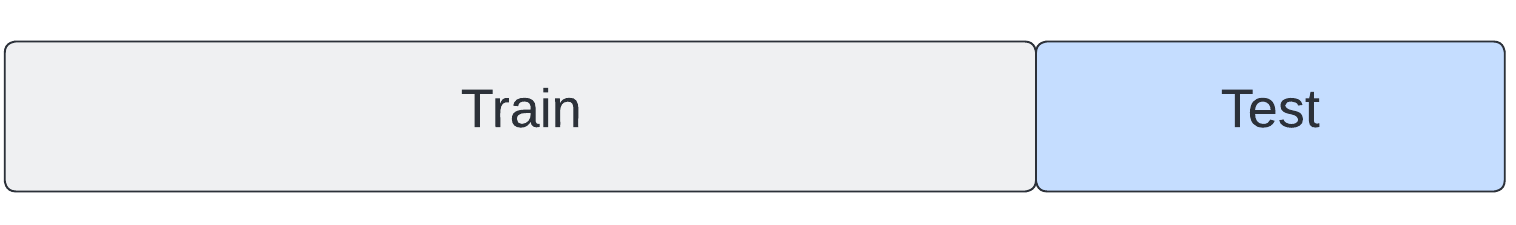

Train and test set

To ensure reproducibility, we should set the random state of the splitting method. This means that Python’s random number generator will produce the same “random” split in future.

In [6]:
# code cell

from sklearn.model_selection import train_test_split


## Missing data

Certain types of models - for example some decision trees - are able to implicitly handle missing data. For our logistic regression, we will need to impute values. We will take a simple approach of replacing with the median.

With physiological data, imputing the median typically implies that the missing observation is not a cause for concern. In hospital you do not want to be the interesting patient!

To avoid data leaking between our training and test sets, we take the median from the training set only. The training median is then used to impute missing values in the held-out test set.

In [7]:
# code cell



# impute missing values from the training set



It is often the case that data is not missing at random. For example, the presence of blood sugar observations may indicate suspected diabetes. To use this information, we can choose to create missing data features comprising of binary “is missing” flags.

## Normalisation

Lastly, normalisation - scaling variables so that they span consistent ranges - can be important, particularly for models that rely on distance based optimisation metrics.

As with creating train and test splits, it is a common enough task that there are plenty of pre-built functions for us to choose from. We will choose the Min-Max Scaler from the sklearn package, which scales each feature between zero and one.

$x_{std} = \frac{x−x_{min}}{x_{max}−x_{min}}$

$x_{scaled} = x_{std} \times (x_{max}−x_{min}) + x_{min}$

In [8]:
# code cell

# Define the scaler
from sklearn.preprocessing import MinMaxScaler

# Alternative is zero mean, unit variance
# Subtract mean, divide by standard deviation
# from sklearn.preprocessing import StandardScaler

# fit the scaler on the training dataset

# scale the training set

# scale the test set

# Learning

This is taken from: https://carpentries-incubator.github.io/machine-learning-novice-python/03-learning/index.html

**Questions**
 - How do machines learn?
 - How can machine learning help us to make predictions?
 - Why is it important to be able to quantify the error in our models?
 - What is an example of a loss function?

**Objectives**
 - Understand the importance of quantifying error.
 - Code a linear regression model that takes inputs, weights, and bias.
 - Code a loss function that quantifies model error.

## How do machines learn?

How do humans learn? Typically we are given examples and we learn rules through trial and error. Machines aren’t that different! In the context of machine learning, we talk about how a model “fits” to the data.

Our model has a number of tweakable parameters. We need to find the optimal values for those parameters such that our model outputs the “best” predictions for a set of input variables.

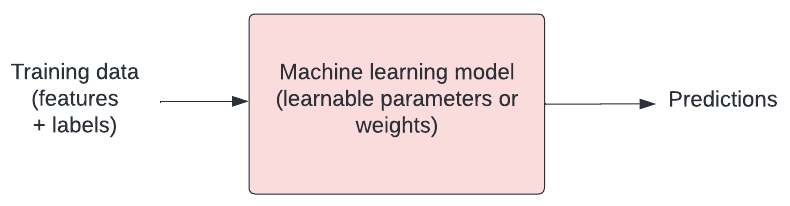



## Loss functions

Finding the best model means defining “best”. We need to have some way of quantifying the difference between a “good” model (capable of making useful predictions) vs a “bad” model (not capable of making useful predictions).

Loss functions are crucial for doing this. They allow us to quantify how closely our predictions fit to the known target values. You will hear “objective function”, “error function”, and “cost function” used in a similar way.

Mean squared error is a common example of a loss function, often used for linear regression. For each prediction, we measure the distance between the known target value (y) and our prediction (yhat), and then we take the square.



Text(0.5, 1.0, 'Prediction error')

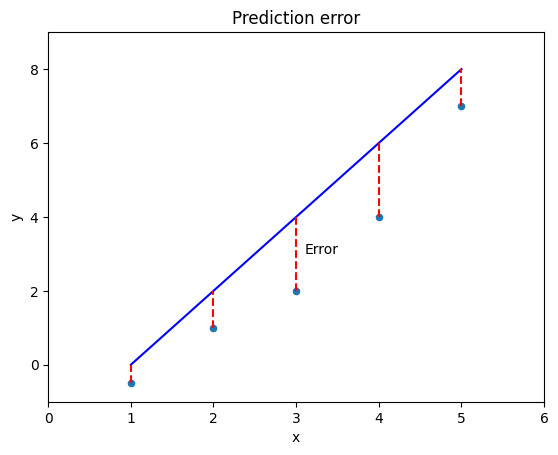

In [9]:
# Code cell

import pandas as pd

# Create sample labelled data
data = {'x': [1, 2, 3, 4, 5], 'y': [-0.5, 1, 2, 4, 7]}
df = pd.DataFrame(data)

# Add predictions
df['y_hat'] = [0, 2, 4, 6, 8]

# plot the data
ax = df.plot(x='x', y='y', kind='scatter', xlim=[0,6], ylim=[-1,9])

# plot approx line of best fit
ax.plot(df['x'], df['y_hat'], color='blue')

# plot error
ax.vlines(x=df['x'], ymin=df['y'], ymax=df['y_hat'], color='red', linestyle='dashed')
ax.text(x=3.1, y=3, s='Error')
ax.set_title('Prediction error')

The further away from the data points our line gets, the bigger the error. Our best model is the one with the smallest error. Mathematically, we can define the mean squared error as:


$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2$

- $\text{MSE}$ is the Mean Squared Error 
- $y_i$ is the actual coordinate values  
- $\hat{y_i}$ is the predicted value. 
- $\sum$ is notation to indicate that we are taking the sum of the difference. 
- $n $ is the total number of observations, so $\frac{1}{n}$ indicates that we are taking the mean.

We could implement this in our code as follows:

In [10]:
import numpy as np

def loss(y, y_hat):
    """
    Loss function (mean squared error).

    Args:
        y (numpy array): The known target values.
        y_hat (numpy array): The predicted values.

    Returns:
        numpy float: The mean squared error.
    """
    distances = y - y_hat
    squared_distances = np.square(distances)
    return np.mean(squared_distances)

## Minimising the error

Our goal is to find the “best” model. We have defined best as being the model with parameters that give us the smallest mean squared error. We can write this as:

$\text{argmin}_{\hat{y}} \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2$

Let’s stop and look at what this loss function means. We’ll plot the squared error for a range of values to demonstrate how loss scales as the difference between $y$ and $\hat{y}$ increases.

Text(0, 0.5, 'Loss (squared error)')

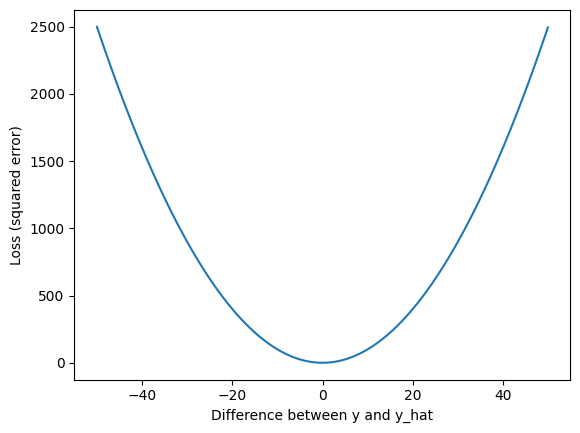

In [11]:
import matplotlib.pyplot as plt

x = np.arange(-50, 50, 0.05)
y = np.square(x)

plt.plot(x, y)
plt.xlabel('Difference between y and y_hat')
plt.ylabel('Loss (squared error)')

As we can see, our loss rapidly increases as predictions ($\hat{y}$) move away from the true values ($y$). The result is that outliers have a strong influence on our model fit.

## Optimisation

In machine learning, there is typically a training step where an algorithm is used to find the optimal set of model parameters (i.e. those parameters that give the minimum possible error). This is the essence of machine learning!

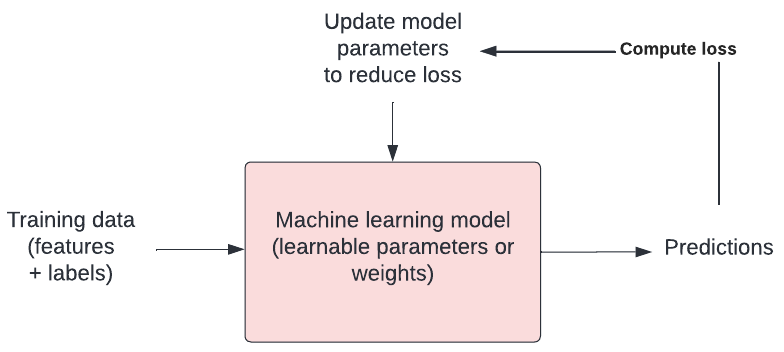


There are many approaches to optimisation. Gradient descent is a popular approach. In gradient descent we take steps in the opposite direction of the gradient of a function, seeking the lowest point (i.e. the lowest error).

## Exercise

**Exercise**

**Questions**
- A) What does a loss function quantify?
- B) What is an example of a loss function?
- C) What are some other names used for loss functions?
- D) What is happening when a model is trained?

**Solution**
- A) A loss function quantifies the goodness of fit of a model (i.e. how closely its predictions match the known targets).
- B) One example of a loss function is mean squared error (M.S.E.).
- C) Objective function, error function, and cost function.
- D) When a model is trained, we are attempting to find the optimal model parameters in process known as “optimisation”.

# Modelling

This is taken from https://carpentries-incubator.github.io/machine-learning-novice-python/04-modelling/index.html

**Questions**
 - Broadly speaking, when talking about regression and classification, how does the prediction target differ?
 - Would linear regression be most useful for a regression or classification task? How about logistic regression?

**Objectives**
 - Use a linear regression model for prediction.
 - Use a logistic regression model for prediction.
 - Set a decision boundary to predict an outcome from a probability.

## Regression vs classification

Predicting one or more classes is typically referred to as classification. The task of predicting a continuous variable on the other hand (for example, length of hospital stay) is typically referred to as a regression.

Note that “regression models” can be used for both regression tasks and classification tasks. Don’t let this throw you off!

We will begin with a linear regression, a type of model borrowed from statistics that has all of the hallmarks of machine learning (so let’s call it a machine learning model!), which can be written as:

$y=wX+b$

It is the most basic model in machine learning and it is broadly used in situations where it makes sense to describe the relationship between the explanatory variables and the dependent variables as linear. What the latter means is simply that in the 2D case, if we were to plot the relationship between explanatory variable and dependent variable on a graph it would look like a straight line!

Our predictions can be denoted by $\hat{y}$
 (pronounced “y hat”) and our explanatory variables (or “features”) denoted by $X$
. In our case, we will use a single feature: the APACHE-IV score, a measure of severity of illness.


There are two parameters of the model that we would like to learn from the training data: 
- $w$, the weight(s) which intuitively corresponds to the slope of the line
- $b$, the bias which intuitively corresponds to where the line intersects the y-axis

Could we use a linear regression for our classification task? Let’s try fitting a line to our outcome data.

In [ ]:
# code cell

# import the regression model
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# use a single feature (apache score)
# note: remove the reshape if fitting to >1 input variable
X = cohort.apachescore.values.reshape(-1, 1)
y = cohort.actualhospitalmortality_enc.values

# fit the model to our data
reg = reg.fit(X, y)

# get the y values
buffer = 0.2*max(X)
X_fit = np.linspace(min(X) - buffer, max(X) + buffer, num=50)
y_fit = reg.predict(X_fit)

# plot
plt.scatter(X, y,  color='black', marker = 'x')
plt.plot(X_fit, y_fit, color='red', linewidth=2)
plt.show()

## Sigmoid function

The sigmoid function (also known as a logistic function) comes to our rescue. This function gives an “s” shaped curve (that's why its called **s**igmoid) that can take a number and map it into a value between $0$ and $1$:

$f:\mathbb{R}\mapsto(0,1)$

The sigmoid function can be written as:

$f(x)=\frac{1}{1+e^{−x}}$

Let’s take a look at a curve generated by this function:

In [ ]:
# code cell


def sigmoid(x, k=0.1):
    """
    Sigmoid function. 
    Adjust k to set slope.
    """
    s = 1 / (1 + np.exp(-x / k)) 
    return s

# set range of values for x
x = np.linspace(-1, 1, 50)

plt.plot(x, sigmoid(x))
plt.show()

We can use this to map our linear regression to produce output values that fall between 0 and 1.


$f(x)=\frac{1}{1+e^{wX+b}}$
As an added benefit, we can interpret the output value as a probability. The probability relates to the positive class (the outcome with value “1”), which in our case is in-hospital mortality (“EXPIRED”).



## Logistic regression

Logistic regressions are powerful models that often outperform more sophisticated machine learning models. In machine learning studies it is typical to include performance of a logistic regression model as a baseline (as they do, for example, in Rajkomar and colleagues).

We need to find the parameters for the best-fitting logistic model given our data. As before, we do this with the help of a loss function that quantifies error. Our goal is to find the parameters of the model that minimise the error. With this model, we no longer use least squares due to the model’s non-linear properties. Instead we will use log loss.

## Training (or fitting) the model
As is typically the case when using machine learning packages, we don’t need to code the loss function ourselves. The function is implemented as part of our machine learning package (in this case scikit-learn). Let’s try fitting a Logistic Regression to our data.



**Exercise**

- A) Following the previous example for a linear regression, fit a logistic regression to your data and create a new plot. How do the predictions differ from before? Hint: from sklearn.linear_model import LogisticRegression.

**Solution**

- A) You should see a plot similar to the one below:

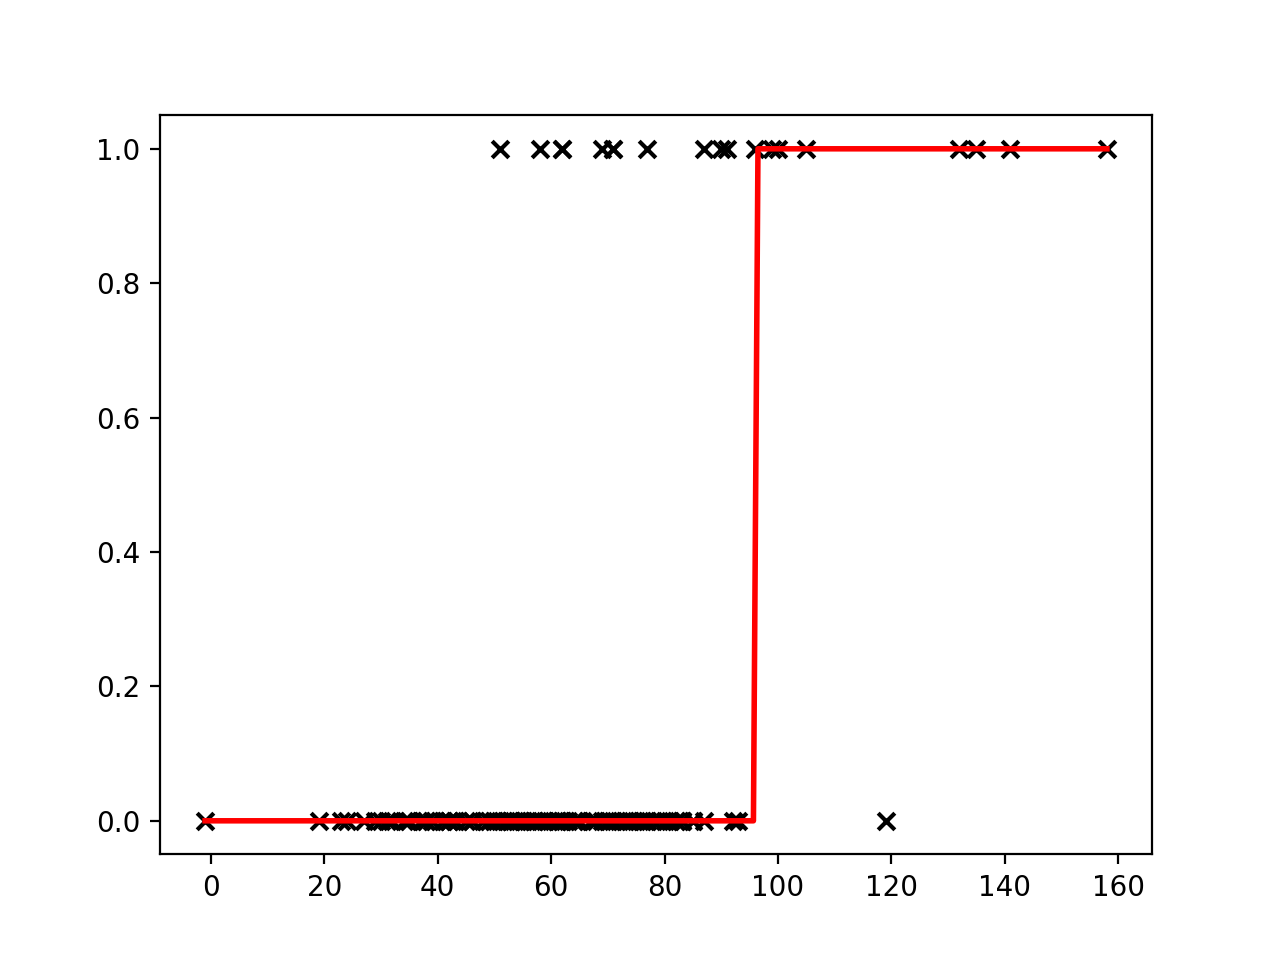



## Decision Boundary

Now that our model is able to output the probability of our outcome, we can set a decision boundary for the classification task. For example, we could classify probabilities of $< 0.5$ as “ALIVE” and $\geq 0.5$ as “EXPIRED”. Using this approach, we can predict outcomes for a given input.

In [ ]:
# Code cell


from sklearn.linear_model import LogisticRegression
# had to edit this


#reg = LinearRegression()


# Validation

This is taken from https://carpentries-incubator.github.io/machine-learning-novice-python/05-validation/index.html

**Questions**
 - What is meant by model accuracy?
 - What is the purpose of a validation set?
 - What are two types of cross validation?
 - What is overfitting?

**Objectives**
 - Train a model to predict patient outcomes on a held-out test set.
 - Use cross validation as part of our model training process.

## Accuracy

One measure of the performance of a classification model is accuracy. Accuracy is defined as the overall proportion of correct predictions. If, for example, we take $50$ shots and $40$ of them hit the target, then our accuracy is $0.8$ ($\frac{40}{50}$).

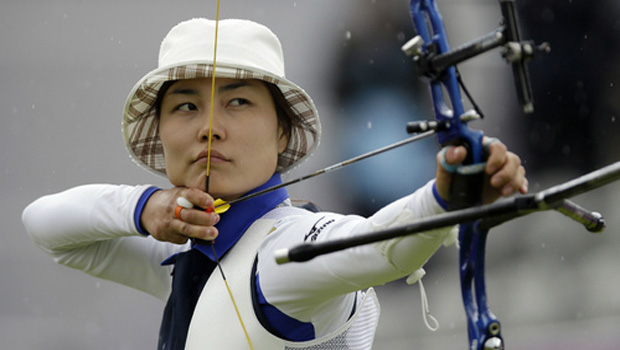

Accuracy can therefore be defined by the formula below:

$\text{Accuracy} = \frac{\text{Correct predictions}}{\text{All predictions}}$
What is the accuracy of our model at predicting in-hospital mortality?


In [ ]:
# code cell


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# convert outcome to a categorical type


# add the encoded value to a new column


# define features and outcome


# partition data into training and test sets


# restructure data for input into model
# note: remove the reshape if fitting to >1 input variable

# train model


# generate predictions


#  accuracy on training set


#  accuracy on test set


Not bad! There was a slight drop in performance on our test set, but that is to be expected.



## Validation set

Machine learning is iterative by nature. We want to improve our model, tuning and evaluating as we go. This leads us to a problem. Using our test set to iteratively improve our model would be cheating. It is supposed to be “held out”, not used for training! So what do we do?

The answer is that we typically partition off part of our training set to use for validation. The “validation set” can be used to iteratively improve our model, allowing us to save our test set for the *final* evaluation.

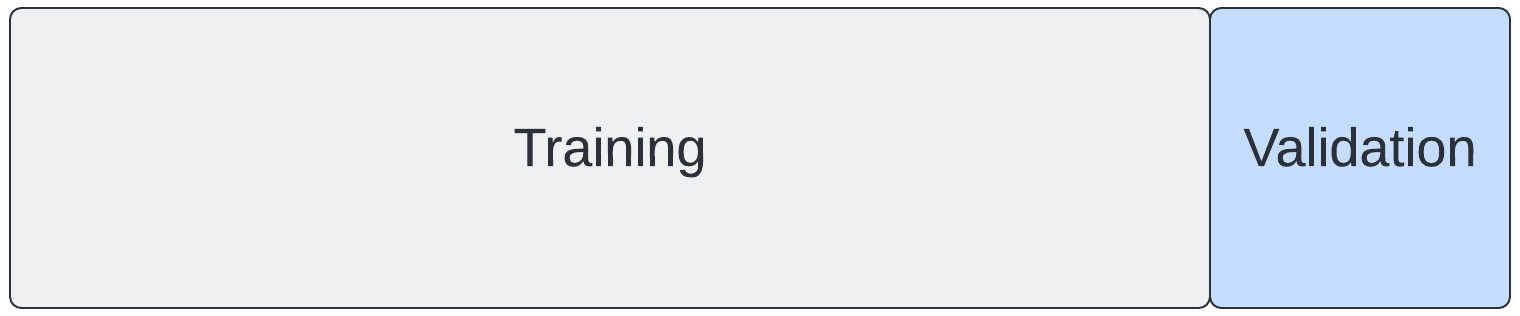



## Cross validation

Why stop at one validation set? With sampling, we can create many training sets and many validation sets, each slightly different. We can then average our findings over the partitions to give an estimate of the model’s predictive performance

The family of resampling methods used for this is known as “cross validation”. It turns out that one major benefit to cross validation is that it helps us to build more robust models.

If we train our model on a single set of data, the model may learn rules that are overly specific (e.g. “all patients aged 63 years survive”). These rules will not generalise well to unseen data. When this happens, we say our model is “overfitted”.

If we train on multiple, subtly-different versions of the data, we can identify rules that are likely to generalise better outside out training set, helping to avoid overfitting.

Two popular of the most popular cross-validation methods:

K-fold cross validation
Leave-one-out cross validation


### K-fold cross validation

In K-fold cross validation, “K” indicates the number of times we split our data into training/validation sets. With 5-fold cross validation, for example, we create 5 separate training/validation sets.

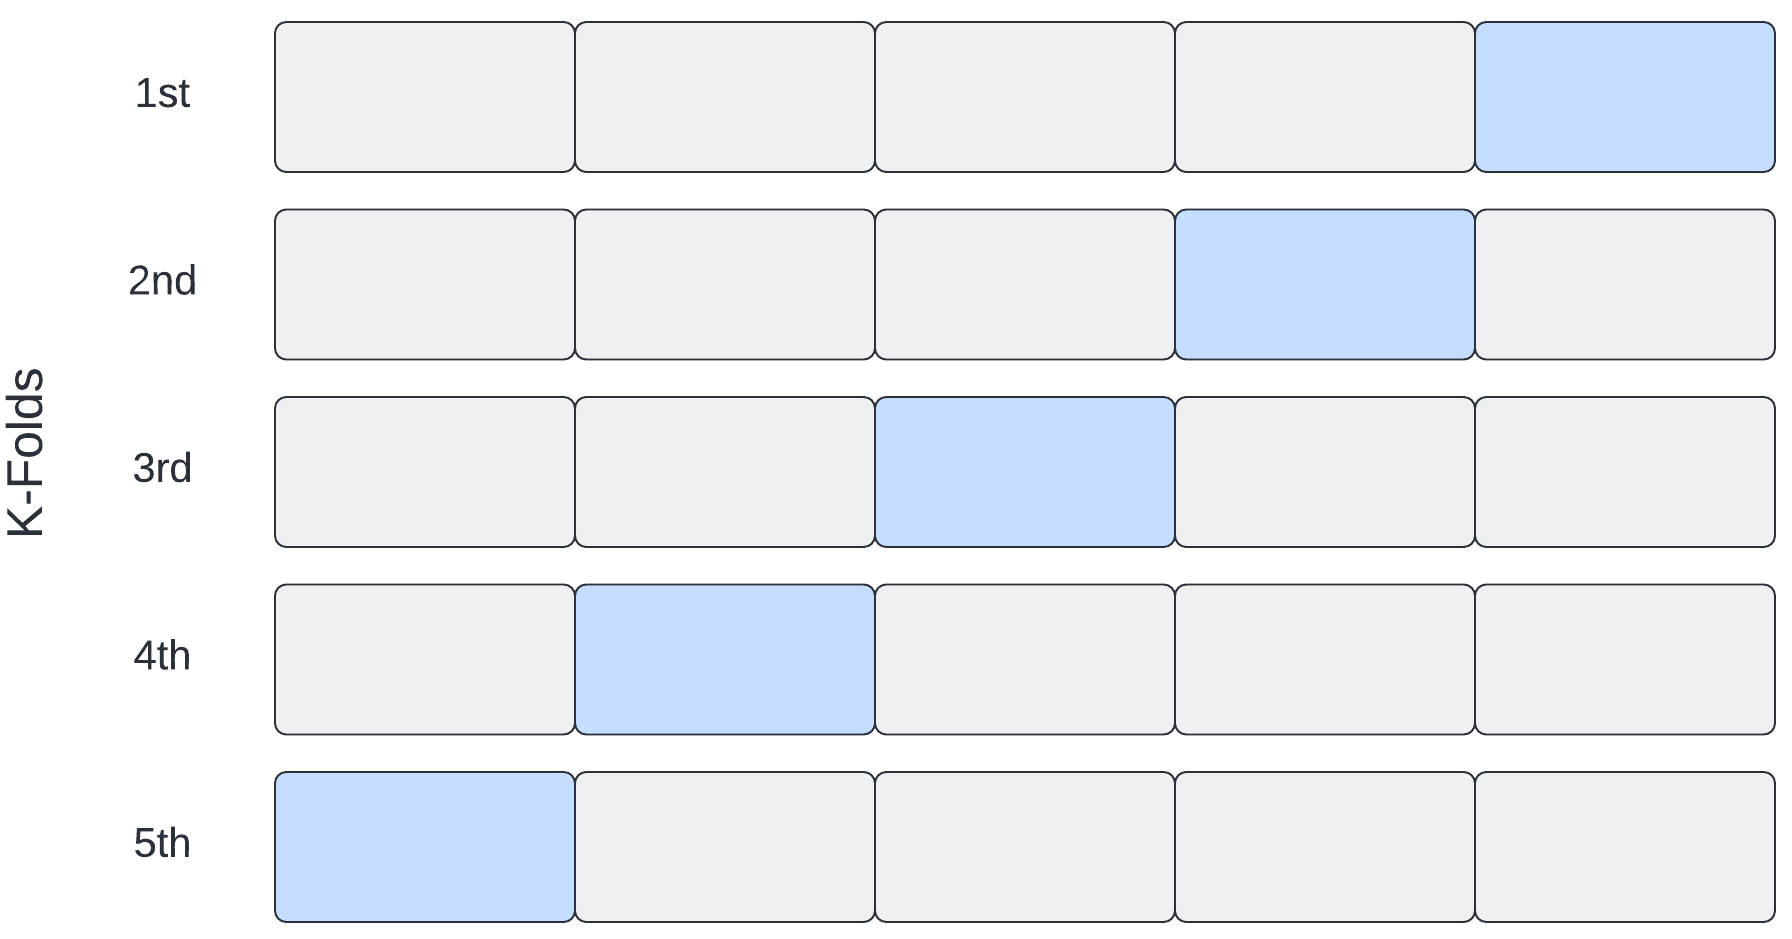

With K-fold cross validation, we select our model to evaluate and then:

Partition the training data into a training set and a validation set. An 80%, 20% split is common.
Fit the model to the training set and make a record of the optimal parameters.
Evaluate performance on the validation set.
Repeat the process 5 times, then average the parameter and performance values.
When creating our training and test sets, we needed to be careful to avoid data leaks. The same applies when creating training and validation sets. We can use a pipeline object to help manage this issue.

In [ ]:
# code cell

from numpy import mean, std
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# define dataset

# define the pipeline


# define the evaluation procedure

# evaluate the model using cross-validation

# report performance


Leave-one-out cross validation is the same idea, except that we have many more folds. In fact, we have one fold for each data point. Each fold we leave out one data point for validation and use all of the other points for training.

## Key Points

 - Validation sets are used during model development, allowing models to be tested prior to testing on a held-out set.

 - Cross-validation is a resampling technique that creates multiple validation sets.

 - Cross-validation can help to avoid overfitting.

# Evaluation

This is taken from https://carpentries-incubator.github.io/machine-learning-novice-python/06-evaluation/index.html

**Questions**
 - What kind of values go into a confusion matrix?
 - What do the letters AUROC stand for?
 - Does an AUROC of 0.5 indicate our predictions were good, bad, or average?
 - In the context of evaluating performance of a classifier, what is TP?

**Objectives**
 - Create a confusion matrix for a predictive model.
 - Use the confusion matrix to compute popular performance metrics.
 - Plot an AUROC curve.

## Evaluating a classification task 

We trained a machine learning model to predict the outcome of patients admitted to intensive care units. As there are two outcomes, we refer to this as a “binary” classification task. We are now ready to evaluate the model on our held-out test set.


In [ ]:
# code cell

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# convert outcome to a categorical type

# add the encoded value to a new column


# define features and outcome


# partition data into training and test sets


# restructure data for input into model
# note: remove the reshape if fitting to >1 input variable


# train model


# generate predictions


Each prediction is assigned a probability of a positive class. For example, the first 10 probabilities are:

In [ ]:
# code cell



These probabilities correspond to the following predictions, either a “0” (“ALIVE”) or a 1 (“EXPIRED”):



In [ ]:
# code cell



In comparison with the known outcomes, we can put each prediction into one of the following categories:

True positive: we predict “1” (“EXPIRED”) and the true outcome is “1”.
True negative: we predict “0” (“ALIVE”) and the true outcome is “0”.
False positive: we predict “1” (“EXPIRED”) and the true outcome is “0”.
False negative: we predict “0” (“ALIVE”) and the true outcome is “1”.

In [ ]:
# code cell



## Confusion matrices

It is common practice to arrange these outcome categories into a “confusion matrix”, which is a grid that records our predictions against the ground truth. For a binary outcome, confusion matrices are organised as follows:

|                       | Negative (Predicted) | Positive (Predicted) |
|-----------------------|-----------------------|----------------------|
| **Negative (Actual)** | TN                    | FP                   |
| **Positive (Actual)** | FN                    | TP                   |


The sum of the cells is the total number of predictions. The diagonal from top left to bottom right indicates correct predictions. 

Let’s visualize the results of the model in the form of a confusion matrix:

In [ ]:
# code cell

#print ("y_test ", y_test)

# import the metrics class
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_hat_test)

class_names=cohort['actualhospitalmortality'].cat.categories
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    reg, x_test, y_test, display_labels=class_names,
    cmap=plt.cm.Blues)

plt.show()

We have two columns and rows because we have a binary outcome, but you can also extend the matrix to plot multi-class classification predictions. If we had more output classes, the number of columns and rows would match the number of classes.

## Accuracy

Accuracy is the overall proportion of correct predictions. Think of a dartboard. How many shots did we take? How many did we hit? Divide one by the other and that’s the accuracy.

Accuracy can be written as:

$\text{Accuracy} =\frac{TP+TN}{TP+TN+FP+FN}$

What was the accuracy of our model?

In [ ]:
# code cell


Not bad at first glance. When comparing our performance to guessing “0” for every patient, however, it seems slightly less impressive!



In [ ]:
# code cell 



The problem with accuracy as a metric is that it is heavily influenced by prevalence of the positive outcome: because the proportion of 1s is relatively low, classifying everything as 0 is a safe bet.

We can see that the high accuracy is possible despite totally missing our target. To evaluate an algorithm in a way that prevalence does not cloud our assessment, we often look at sensitivity and specificity.

## Sensitivity (A.K.A “Recall” and “True Positive Rate”)

Sensitivity is the ability of an algorithm to predict a positive outcome when the actual outcome is positive. In our case, of the patients who die, what proportion did we correctly predict? This can be written as:

$\text{Sensitivity} = \text{Recall} = \frac{TP}{TP+FN}$

Because a model that calls “1” for everything has perfect sensitivity, this measure is not enough on its own. Alongside sensitivity we often report on specificity.

## Specificity (A.K.A “True Negative Rate”)

Specificity relates to the test’s ability to correctly classify patients who survive their stay (i.e. class “0”). Specificity is the proportion of those who survive who are predicted to survive. The formula for specificity is:

$\text{Specificity} = \frac{TN}{FP+TN}$


## Receiver-Operator Characteristic

A Receiver-Operator Characteristic (ROC) curve plots 1 - specificity vs. sensitivity at varying probability thresholds. The area under this curve is known as the AUROC (or sometimes just the “Area Under the Curve”, AUC) and it is a well-used measure of discrimination that was originally developed by radar operators in the 1940s.

In [ ]:
# code cell
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(reg, x_test, y_test)


An AUROC of 0.5 is no better than guessing and an AUROC of 1.0 is perfect. An AUROC of 0.9 tells us that the 90% of times our model will assign a higher risk to a randomly selected patient with an event than to a randomly selected patient without an event



 #### Key Points
    
 - Confusion matrices are the basis for many popular performance metrics.

 - AUROC is the area under the receiver operating characteristic. 0.5 is bad!

 - TP is True Positive, meaning that our prediction hit its target.

# Clustering


Taken from https://carpentries-incubator.github.io/machine-learning-novice-sklearn/05-clustering/index.html

**Questions**
  - What is unsupervised learning?
  - How can we use use the k-means algorithm to find structure in the data?
  - What are some advantages and limitations of the k-means clustering algorithm?
  - What are some other methods that can be used when k-means doesn't work? What is spectral clustering?

**Objectives**
 - Understand the difference between supervised and unsupervised learning
 - Identify clusters in data using k-means clustering
 - Understand the limitations of k-means when clusters overlap
 - Use spectral clustering to overcome the limitations of k-means

## Unsupervised learning

Sometimes we do not have the luxury of using labelled data. This could be for a number of reasons:

We have labelled data, but not enough to accurately train our model
Our existing labelled data is low-quality or innacurate
It is too time-consuming to (manually) label more data
We have data, but no idea what correlations might exist that we could model!
In this case we need to use unsupervised learning. As the name suggests, this time we do not “supervise” the ML algorithm by providing it labels, but instead we let it try to find its own patterns in the data and report back on any correlations that it might find. You can think of unsupervised learning as a way to discover labels from the data itself.



## Clustering

Clustering is the grouping of data points which are similar to each other. It can be a powerful technique for identifying patterns in data. Clustering analysis does not usually require any training and is therefore known as an unsupervised learning technique. Clustering can be applied quickly due to this lack of training.



## Applications of Clustering 

 - Looking for trends in data
 - Reducing the data around a point to just that point (e.g. reducing colour depth in an image)
 - Pattern recognition

## K-means clustering 

The k-means clustering algorithm is a simple clustering algorithm that tries to identify the centre of each cluster. It does this by searching for a point which minimises the distance between the centre and all the points in the cluster. The algorithm needs to be told how many k clusters to look for, but a common technique is to try different numbers of clusters and combine it with other tests to decide on the best combination.

### Hyper-parameters 

‘K’ is also an exmaple of a hyper-parameter for the k-means clustering technique. Another example of a hyper-parameter is the N-degrees of freedom for polynomial regression. Keep an eye out for others throughout the lesson!

### K-means with scikit-learn

To perform a k-means clustering with Scikit-Learn we first need to import the sklearn.cluster module.



In [ ]:
# code cell

import sklearn.cluster as skl_cluster


For this example, we’re going to use Scikit-Learn’s built-in ‘random data blob generator’ instead of using an external dataset. Therefore we’ll need the sklearn.datasets.samples_generator module.



In [ ]:
# code cell

import sklearn.datasets as skl_datasets


Now lets create some random blobs using the make_blobs function. The n_samples argument sets how many points we want to use in all of our blobs while cluster_std sets the standard deviation of the points. The smaller this value the closer together they will be. centers sets how many clusters we’d like. random_state is the initial state of the random number generator. By specifying this value we’ll get the same results every time we run the program. If we don’t specify a random state then we’ll get different points every time we run. This function returns two things: an array of data points and a list of which cluster each point belongs to.



In [ ]:
# code cell

import matplotlib.pyplot as plt

#Lets define some functions here to avoid repetitive code
def plots_labels(data, labels):
    tx = data[:, 0]
    ty = data[:, 1]

    fig = plt.figure(1, figsize=(4, 4))
    plt.scatter(tx, ty, edgecolor='k', c=labels)
    plt.show()

def plot_clusters(data, clusters, Kmean):
    tx = data[:, 0]
    ty = data[:, 1]
    fig = plt.figure(1, figsize=(4, 4))
    plt.scatter(tx, ty, s=5, linewidth=0, c=clusters)
    for cluster_x, cluster_y in Kmean.cluster_centers_:
        plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')
    plt.show()


Lets create the clusters.



In [ ]:
# code cell

data, cluster_id = skl_datasets.make_blobs(n_samples=400, cluster_std=.75, centers=4, random_state=1)
plots_labels(data, cluster_id)


Now that we have some data we can try to identify the clusters using k-means. First, we need to initialise the KMeans module and tell it how many clusters to look for. Next, we supply it with some data via the fit function, in much the same way we did with the regression functions earlier on. Finally, we run the predict function to find the clusters.



In [ ]:
# code cell



The data can now be plotted to show all the points we randomly generated. To make it clearer which cluster points have been classified we can set the colours (the c parameter) to use the clusters list that was returned by the predict function. The Kmeans algorithm also lets us know where it identified the centre of each cluster. These are stored as a list called ‘cluster_centers_’ inside the Kmean object. Let’s plot the points from the clusters, colouring them by the output from the K-means algorithm, and also plot the centres of each cluster as a red X.



In [ ]:
# code cell

plot_clusters(data, clusters, Kmean)


### Working in multiple dimensions
Although this example shows two dimensions, the kmeans algorithm can work in more than two. It becomes very difficult to show this visually once we get beyond 3 dimensions. Its very common in machine learning to be working with multiple variables and so our classifiers are working in multi-dimensional spaces.

### Limitations of k-means
 - Requires number of clusters to be known in advance
 - Struggles when clusters have irregular shapes
 - Will always produce an answer finding the required number of clusters even if the data isn’t clustered (or clustered in that many clusters)
 - Requires linear cluster boundaries


### Advantages of k-means

 - Simple algorithm and fast to compute
 - A good choice as the first thing to try when attempting to cluster data
 - Suitable for large datasets due to its low memory and computing requirements


## Spectral clustering

Spectral clustering is a technique that attempts to overcome the linear boundary problem of k-means clustering. It works by treating clustering as a graph partitioning problem and looks for nodes in a graph with a small distance between them. See this introduction to spectral clustering if you are interested in more details about how spectral clustering works.

Here is an example of spectral clustering on two concentric circles:

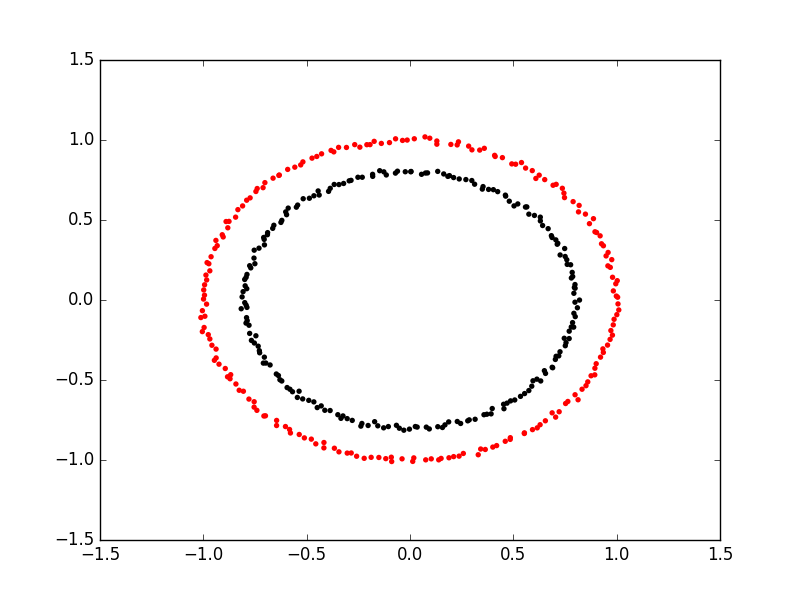

Spectral clustering uses something called a ‘kernel trick’ to introduce additional dimensions to the data. A common example of this is trying to cluster one circle within another (concentric circles). A k-means classifier will fail to do this and will end up effectively drawing a line which crosses the circles. However spectral clustering will introduce an additional dimension that effectively moves one of the circles away from the other in the additional dimension. This does have the downside of being more computationally expensive than k-means clustering.


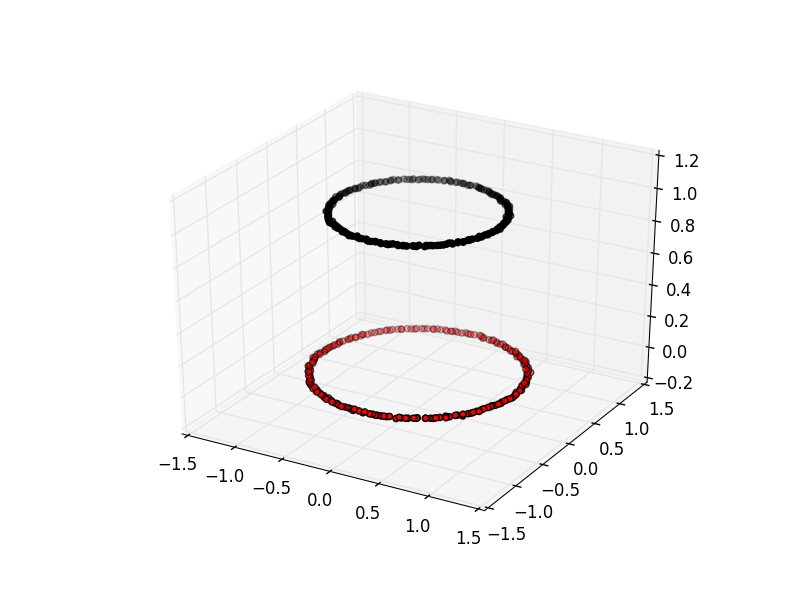



### Spectral clustering with Scikit-Learn

Lets try out using Scikit-Learn’s spectral clustering. To make the concentric circles in the above example we need to use the make_circles function in the sklearn.datasets module. This works in a very similar way to the make_blobs function we used earlier on.



In [ ]:
# code cell

import sklearn.datasets as skl_data

circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)
plots_labels(circles, circles_clusters)

The code for calculating the SpectralClustering is very similar to the kmeans clustering, but instead of using the sklearn.cluster.KMeans class we use the sklearn.cluster.SpectralClustering class.



In [ ]:
# code cell


The SpectralClustering class combines the fit and predict functions into a single function called fit_predict.



In [ ]:
# code cell



Here is the whole program combined with the kmeans clustering for comparison. Note that this produces two figures. To view both of them use the “Inline” graphics terminal inside the Python console instead of the “Automatic” method which will open a window and only show you one of the graphs.



In [ ]:
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data

circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

# cluster with kmeans


# plot the data, colouring it by cluster


# cluster with spectral clustering


## Exercise

**Exercise - Comparing k-means and spectral clustering performance**

- Modify the program we wrote in the previous exercise to use spectral clustering instead of k-means

- Time how long both programs take to run. Add the line import time at the top of both files as the first line, and get the start time with `start_time = time.time()`. End the program by getting the time again and subtracting the start time from it to get the total run time. Add `end_time = time.time()` and `print("Elapsed time:",end_time-start_time,"seconds")` to the end of both files. 

- Compare how long both programs take to run generating 4,000 samples and testing them for between 2 and 10 clusters. 

- How much did your run times differ? How much do they differ if you increase the number of samples to 8,000? How long do you think it would take to compute 800,000 samples (estimate this, it might take a while to run for real)?



**Solution**


In [ ]:
# code cell
# spectral

import matplotlib.pyplot as plt
import sklearn.cluster as skl_cluster
from sklearn.datasets import make_blobs 
import time

start_time = time.time()
data, cluster_id = make_blobs(n_samples=4000, cluster_std=3,
                                       centers=4, random_state=1)

for cluster_count in range(2,11):
    Kmean = skl_cluster.KMeans(n_clusters=cluster_count)
    Kmean.fit(data)
    clusters = Kmean.predict(data)

    plt.scatter(data[:, 0], data[:, 1], s=15, linewidth=0, c=clusters)
    plt.title(str(cluster_count)+" Clusters")

plt.show()

end_time = time.time()
print("Elapsed time = ", end_time-start_time, "seconds")

In [ ]:
# code cell
# spectral

import matplotlib.pyplot as plt
import sklearn.cluster as skl_cluster
from sklearn.datasets import make_blobs 
import time

start_time = time.time()
data, cluster_id = make_blobs(n_samples=4000, cluster_std=3,
                                       centers=4, random_state=1)

for cluster_count in range(2,11):
    model = skl_cluster.SpectralClustering(n_clusters=cluster_count,
                                       affinity='nearest_neighbors',
                                       assign_labels='kmeans')
    labels = model.fit_predict(data)
    
    plt.scatter(data[:, 0], data[:, 1], s=15, linewidth=0, c=labels)
    plt.title(str(cluster_count)+" Clusters")
plt.show()
end_time = time.time()
print("Elapsed time = ", end_time-start_time, "seconds")

## Key Points

 - Clustering is a form of unsupervised learning.

 - Unsupervised learning algorithms don’t need training.

 - Kmeans is a popular clustering algorithm.

 - Kmeans is less useful when one cluster exists within another, such as concentric circles.

 - Spectral clustering can overcome some of the limitations of Kmeans.

 - Spectral clustering is much slower than Kmeans.

 - Scikit-Learn has functions to create example data.

# Data Leakage

This is taken from https://carpentries-incubator.github.io/machine-learning-novice-python/08-leakage/index.html

**Questions**
 - What are common types of data leakage?
 - How does data leakage occur?
 - What are the implications of data leakage?

**Objectives**
 - Learn to recognise common causes of data leakage.
 - Understand how data leakage affects models.

## Data Leakagae

Data leakage is the mistaken use of information in the model training process that in reality would not be available at prediction time. The result of data leakage is overly optimistic expectations and poor performance in out-of-sample datasets.

An extreme example of data leakage would be accidentally including a prediction target in a training dataset. In this case our model would perform very well on training data. The model would fail, however, when moved to a real-life setting where the outcome was not available at prediction time.

In most cases information leakage is much more subtle than including the outcome in the training data, and it may occur at many stages during the model training process.


## Subset contamination

It is common to impute missing values, for example by replacing missing values with the mean or median. Similarly, data is often normalised by dividing through by the average or maximum.

If these steps are done using the full dataset (i.e. the training and testing data), then information about the testing data will “leak” into the training data. The result is likely to be overoptimistic performance on the test set. For this reason, imputation and normalisation should be done on subsets independently.

Another issue that can lead to data leakage is to not account for grouping within a dataset when creating train-test splits. Let’s say, for example, that we are trying to use chest x-rays to predict which patients have cardiac disease. If the same patient appears multiple times within our dataset and this patient appears in both our training and test set, this may be cause for concern.

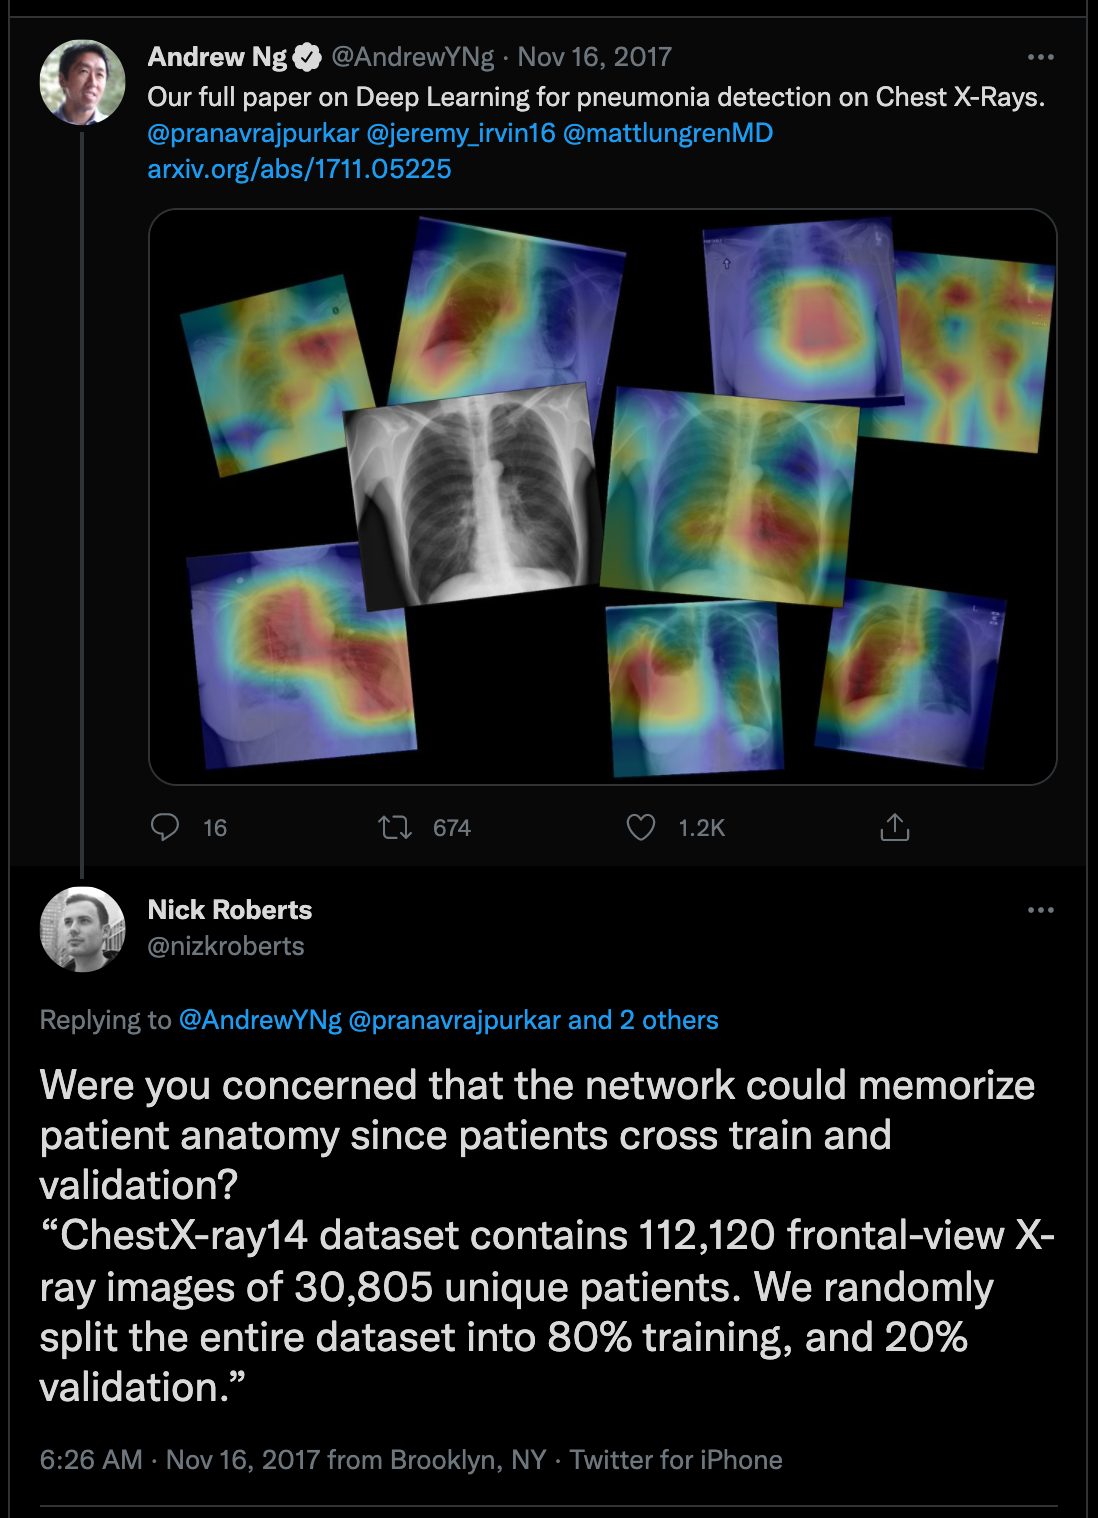




## Target leakage

Target leakage occurs when a prediction target is inadvertently used in the training process.

The following abstract is taken from a 2018 paper entitled: “Prediction of Incident Hypertension Within the Next Year: Prospective Study Using Statewide Electronic Health Records and Machine Learning”:

**Background**:
- As a high-prevalence health condition, hypertension is clinically costly, difficult to manage, and often leads to severe and life-threatening diseases such as cardiovascular disease (CVD) and stroke.

**Objective**: 
- The aim of this study was to develop and validate prospectively a risk prediction model of incident essential hypertension within the following year.

**Methods**:
- Data from individual patient electronic health records (EHRs) were extracted from the Maine Health Information Exchange network. Retrospective (N=823,627, calendar year 2013) and prospective (N=680,810, calendar year 2014) cohorts were formed. A machine learning algorithm, XGBoost, was adopted in the process of feature selection and model building. It generated an ensemble of classification trees and assigned a final predictive risk score to each individual.

**Results**:
- The 1-year incident hypertension risk model attained areas under the curve (AUCs) of 0.917 and 0.870 in the retrospective and prospective cohorts, respectively. Risk scores were calculated and stratified into five risk categories, with 4526 out of 381,544 patients (1.19%) in the lowest risk category (score 0-0.05) and 21,050 out of 41,329 patients (50.93%) in the highest risk category (score 0.4-1) receiving a diagnosis of incident hypertension in the following 1 year. Type 2 diabetes, lipid disorders, CVDs, mental illness, clinical utilization indicators, and socioeconomic determinants were recognized as driving or associated features of incident essential hypertension. The very high risk population mainly comprised elderly (age>50 years) individuals with multiple chronic conditions, especially those receiving medications for mental disorders. Disparities were also found in social determinants, including some community-level factors associated with higher risk and others that were protective against hypertension.

**Conclusions**:
- With statewide EHR datasets, our study prospectively validated an accurate 1-year risk prediction model for incident essential hypertension. Our real-time predictive analytic model has been deployed in the state of Maine, providing implications in interventions for hypertension and related diseases and hopefully enhancing hypertension care.

## Exercise

**Exercise**
 - What is the prediction target?
 - What kind of algorithm is used in the study?
 - What performance metric is reported in the results?
 - For another take on it: https://www.kaggle.com/code/alexisbcook/data-leakage

**Solution**
 - The prediction target is “hypertension within the following year.”
 - The study uses XGBoost, a tree based model.
 - The abstract reports AUC (Area under the Receiver Operating Characteristic Curve.


In a subsequent paper, entitled Data Leakage in Health Outcomes Prediction With Machine Learning Chiavegatto, Filho et al reflect on the previous study. The abstract is copied below:

> The objective of the study was to “develop and validate prospectively a risk prediction model of incident essential hypertension within the following year.” The authors follow good prediction protocols by applying a high-performing machine learning algorithm (XGBoost) and by validating the results on unseen data from the following year. The algorithm attained a very high area under the curve (AUC) value of 0.870 for incidence prediction of hypertension in the following year.
>
> The authors follow this impressive result by commenting on some of the most important predictive variables, such as demographic features, diagnosed chronic diseases, and mental illness. The ranking of the variables that were most important for the predictive performance of hypertension is included in a multimedia appendix; however, the above-mentioned variables are not listed near the top. Of the six most important variables, five were: lisinopril, hydrochlorothiazide, enalapril maleate, amlodipine besylate, and losartan potassium. All of these are popular antihypertensive drugs.
> 
> By including the use of antihypertensive drugs as predictors for hypertension incidence in the following year, Dr Ye and colleagues’ work opens the possibility that the machine learning algorithm will focus on predicting those already with hypertension but did not have this information on their medical record at baseline. … just one variable (the use of a hypertension drug) is sufficient for physicians to infer the presence of hypertension.



**Exercise**
 - What are lisinopril, hydrochlorothiazide, enalapril maleate, amlodipine besylate, and losartan potassium?
 - Why is it problematic that these drugs are included as features in the model?

**Solution**
 - They are drugs that are prescribed to people with hypertension.
 - The fact that patients were taking the drugs suggests that hypertension was already known.

## Key Points

 - Leakage occurs when training data is contaminated with information that is not available at prediction time.

 - Leakage leads to over-optimistic expectations of performance